<a href="https://colab.research.google.com/github/JyotiRawat29/MastersThesis/blob/main/oversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
from torch import Tensor
import torch.nn.functional as f
from torch import nn
import scipy.io as sio
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import TensorDataset, DataLoader
from multiprocessing import cpu_count
import torch.nn.functional as F
import torch.optim as optim
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
!pip install torchinfo
from tensorflow import summary
from torchinfo import summary
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

**Load Data from source files into numpy array **

In [ ]:
torch.cuda.empty_cache()
#load the ECG file
src_dataset = sio.loadmat('/content/drive/MyDrive/ECG2(withDA).mat')
#load the labels
label=pd.read_csv('/content/drive/MyDrive/label.csv',header=None)

In [ ]:
#print(src_dataset)
testdata = src_dataset['ECG'] # use the key for data here
X=testdata['Data']

In [ ]:
X=np.array(X[0])

In [ ]:
X = np.vstack(X[:,]).astype(np.float)

In [ ]:
#X=torch.from_numpy(X)

In [ ]:
label=np.array(label, dtype=object)
label=np.array(label)
label= np.vstack(label[:,]).astype(np.float)

**DATA DISTRIBUTION**

In [ ]:
#count number of values for each label
count = np.array(np.unique(label, return_counts=True)).T

In [ ]:
classes = count[:,0]
values = count[:,1]

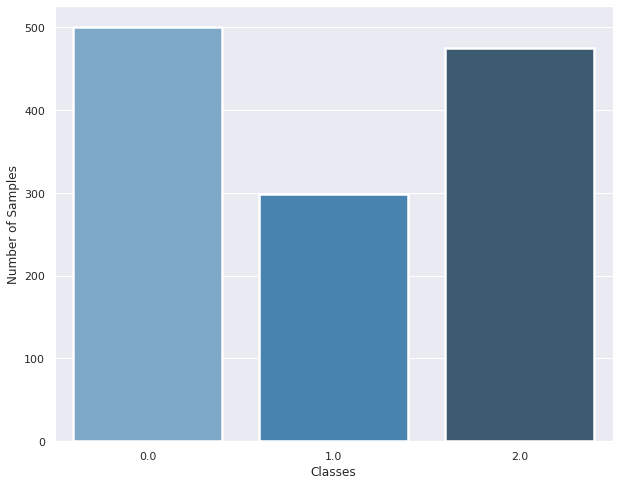

In [ ]:
sns.set(font_scale =1)
plt.figure(figsize=(10,8))
ax = sns.barplot(x = classes, y = values, palette="Blues_d", linewidth=2.5, dodge=False)
ax.set(xlabel='Classes', ylabel='Number of Samples')
plt.savefig('sample_distribution.png')

**PRE PROCESSING OF THE DATA**

In [ ]:
X

array([[ 0.01601611,  0.01644181,  0.01690118, ...,  0.00294596,
         0.00106469, -0.00456328],
       [-0.11488888, -0.12236424, -0.12891141, ..., -0.03361464,
        -0.03650065, -0.03900078],
       [-0.04865461, -0.06793926, -0.0696586 , ..., -0.30155847,
        -0.33376829, -0.34922594],
       ...,
       [ 0.11534132,  0.10149052,  0.08043098, ..., -0.12040478,
        -0.10044553, -0.07588876],
       [-0.04609605, -0.03321084, -0.01958534, ..., -0.01756399,
        -0.01391065, -0.01017211],
       [ 0.03929655,  0.01265927, -0.00714671, ...,  0.02241839,
         0.03816335,  0.05258733]])

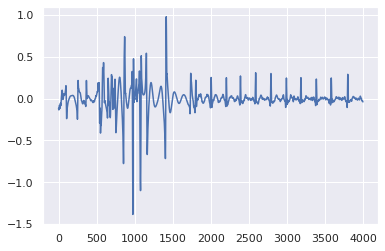

In [ ]:
plt.plot(X[1,:])

In [ ]:
plt.plot(X) #viewing distribution of X samples

In [ ]:
a1 = np.linalg.norm(X[1,:])

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
X= X/np.linalg.norm(X) # data normalisation

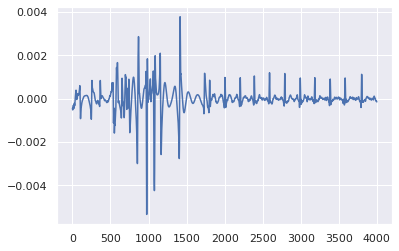

In [ ]:
plt.plot(X[1,:])

In [ ]:
plt.plot(X)

In [ ]:
print("shape of X is",X.shape)
print("shape of Y is", label.shape)

shape of X is (1273, 4000)
shape of Y is (1273, 1)


**OVERSAMPLING**

In [ ]:

smote = SMOTE()

In [ ]:
x_smote, y_smote = smote.fit_resample(X, label)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("shape of X after oversampling is",x_smote.shape)
print("shape of Y after oversampling is", y_smote.shape)

shape of X after oversampling is (1500, 4000)
shape of Y after oversampling is (1500,)


In [ ]:
count = np.array(np.unique(y_smote, return_counts=True)).T

In [ ]:
classes = count[:,0]
values = count[:,1]

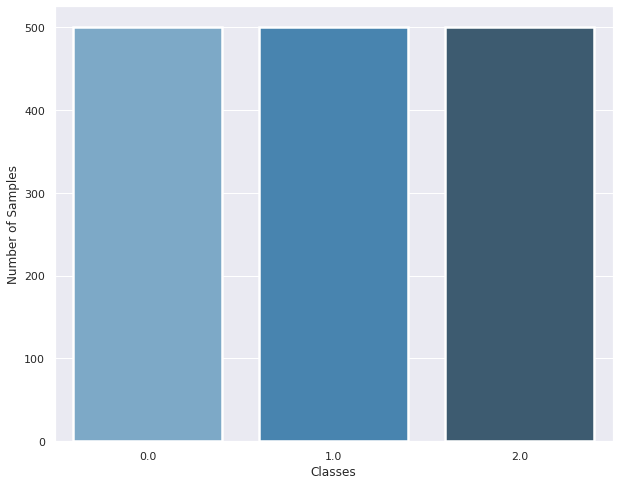

In [ ]:
sns.set(font_scale =1)
plt.figure(figsize=(10,8))
ax = sns.barplot(x = classes, y = values, palette="Blues_d", linewidth=2.5, dodge=False)
ax.set(xlabel='Classes', ylabel='Number of Samples')
plt.savefig('sample_distribution.png')

In [ ]:
X = torch.from_numpy(x_smote)
Y = torch.from_numpy(y_smote)

In [ ]:
X.shape

torch.Size([1500, 4000])

In [ ]:
Y.size()

torch.Size([1500])

In [ ]:
Y = Y.resize(1500,1)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:490: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


**DATA PREPARATION**

In [ ]:
def create_datasets(X, Y):
    print("len of X and Y is",X.shape,Y.shape)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y) 
    X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.25, stratify = Y_train) 
    #squeeze labelled data to make it 1 dimension array
    
    Y_train=torch.squeeze(Y_train)
    Y_valid=torch.squeeze(Y_valid)
    Y_test=torch.squeeze(Y_test)

    print("X_train, X_valid, X_test shape before list comprehension",X_train.shape, X_valid.shape, X_test.shape)
    print("X_train, X_valid, X_test dtype before list comprehension",X_train.dtype, X_valid.dtype, X_test.dtype)
    print("Y_train, Y_valid, Y_test dtype before list comprehension",Y_train.dtype, Y_valid.dtype, Y_test.dtype)
    #the tensors created have dtype float64 but the models have dtypes float32 and its easier to change dtypes of the tensors instead of a model
   
    X_train, X_valid, X_test = [torch.tensor(arr, dtype=torch.float32) for arr in (X_train, X_valid,X_test)]
    Y_train, Y_valid,Y_test = [torch.tensor(arr, dtype=torch.long) for arr in (Y_train, Y_valid,Y_test)]
    print("X_train, X_valid, X_test shape after list comprehension",X_train.shape, X_valid.shape, X_test.shape)
    print("X_train, X_valid, X_test dtype before list comprehension",X_train.dtype, X_valid.dtype, X_test.dtype)
    print("Y_train, Y_valid, Y_test dtype before list comprehension",Y_train.dtype, Y_valid.dtype, Y_test.dtype)
    #convert training and testing data into Tensor Dataset
    
    train_ds = TensorDataset(X_train, Y_train)
    valid_ds = TensorDataset(X_valid, Y_valid)
    test_ds = TensorDataset(X_test,Y_test)
    print("train_ds, valid_ds, test_ds length of datasets respectively",len(train_ds), len(valid_ds), len(test_ds))
    return train_ds, valid_ds,test_ds

In [ ]:
def create_loaders(train_ds, valid_ds,test_ds, bs, jobs=0):
    train_dl = DataLoader(train_ds, bs, shuffle=True, num_workers=jobs)
    valid_dl = DataLoader(valid_ds, bs, shuffle=True, num_workers=jobs)
    test_dl = DataLoader(test_ds, bs, shuffle=True, num_workers=jobs)
    print("lenth of data loaders train_dl, valid_dl, test_dl",len(train_dl), len(valid_dl), len(test_dl))
    return train_dl, valid_dl, test_dl

In [ ]:
def accuracy(output, target):
    return (output.argmax(dim=1) == target).float().mean().item()

In [ ]:
class LSTMClassifier(nn.Module):
 

    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

        
    def forward(self, x):
        h0, c0 = self.init_hidden(x)
        out, (hn, cn) = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


    def init_hidden(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)
        return [t.to(device) for t in (h0, c0)]


In [ ]:
train_ds, val_ds, test_data = create_datasets(X, Y)

len of X and Y is torch.Size([1500, 4000]) torch.Size([1500, 1])
X_train, X_valid, X_test shape before list comprehension torch.Size([900, 4000]) torch.Size([300, 4000]) torch.Size([300, 4000])
X_train, X_valid, X_test dtype before list comprehension torch.float64 torch.float64 torch.float64
Y_train, Y_valid, Y_test dtype before list comprehension torch.float64 torch.float64 torch.float64
X_train, X_valid, X_test shape after list comprehension torch.Size([900, 4000]) torch.Size([300, 4000]) torch.Size([300, 4000])
X_train, X_valid, X_test dtype before list comprehension torch.float32 torch.float32 torch.float32
Y_train, Y_valid, Y_test dtype before list comprehension torch.int64 torch.int64 torch.int64
train_ds, valid_ds, test_ds length of datasets respectively 900 300 300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
bs =32
print(f'Creating data loaders with batch size: {bs}')
train_dl, val_dl,test_data = create_loaders(train_ds, val_ds,test_data, bs, jobs=cpu_count())

Creating data loaders with batch size: 32
lenth of data loaders train_dl, valid_dl, test_dl 29 10 10


In [ ]:

input_dim = 1
hidden_dim = 100
layer_dim = 1
output_dim = 3
seq_dim = 4000
lr = 0.001
n_epochs = 100
iterations_per_epoch = len(train_dl)
best_acc = 0
patience, trials = 100, 0




In [ ]:
model = LSTMClassifier(input_dim,hidden_dim,layer_dim,output_dim)
model = model.to(device)
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr)

In [ ]:
model

LSTMClassifier(
  (lstm): LSTM(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=3, bias=True)
)

In [ ]:
summary(model)

Layer (type:depth-idx)                   Param #
LSTMClassifier                           --
├─LSTM: 1-1                              41,200
├─Linear: 1-2                            303
Total params: 41,503
Trainable params: 41,503
Non-trainable params: 0

In [ ]:
import copy
best_model_wts = copy.deepcopy(model.state_dict())

In [ ]:
history = dict(train =[], val = [])
act =[]
pred = []
best_loss = 1
best_model_wts = copy.deepcopy(model.state_dict())
for epoch in range(1, n_epochs + 1):
    train_losses = []
    val_losses = []
    print(f'training loop :: epoch is {epoch}')
    for i, (x_batch, y_batch) in enumerate(train_dl):
        
        model.train() #optional, it is done to set the model in training mode which is by default
        optimizer.zero_grad()
        #added the dimesnion here at 2nd position which makes the shape of tensor (32,4000,1)
        x_batch=torch.unsqueeze(x_batch,2)
        optimizer.zero_grad()
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        out = model(x_batch)
        loss = criteria(out,y_batch)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())
#VALIDATION LOOP
    model.eval()
    correct, total = 0, 0
    y_class = []
    pred_class = []
    #problem with the x_val size and type here
    print(f'validation loop :: epoch is {epoch}')
    for x_val, y_val in val_dl:
        model.eval()
        x_val, y_val = [t for t in (x_val, y_val)]
        x_val = x_val.to(device)
        y_val = y_val.to(device)
        x_val=torch.unsqueeze(x_val,2)
        out = model(x_val)
        loss_val = criteria(out,y_val)
        val_losses.append(loss_val.item())
        preds = F.log_softmax(out, dim=1).argmax(dim=1)
        print("preds",preds)
        print("y_val",y_val)
        total += y_val.size(0)
        correct += (preds == y_val).sum().item()

    train_loss = np.mean(train_losses)
    val_loss = np.mean(val_losses)
    acc = correct / total
    y_class+=y_val.tolist()
    pred_class+=preds.tolist()
    act.append(y_class)
    pred.append(pred_class)
    history['train'].append(train_loss)
    history['val'].append(val_loss) 

    print(f'Epoch: {epoch:3d}. Loss: {loss.item():.4f}. Acc.: {acc:2.2%}')

    if acc > best_acc:
        trials = 0
        best_acc = acc
        torch.save(model.state_dict(), 'best.pth')
        print(f'Epoch {epoch} best model saved with accuracy: {best_acc:2.2%}')
writer.flush()
writer.add_graph(model,x_batch)
writer.close()
model.load_state_dict(best_model_wts)




training loop :: epoch is 1
validation loop :: epoch is 1
preds tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')
y_val tensor([0, 0, 0, 2, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0, 2,
        2, 0, 1, 2, 1, 2, 0, 2], device='cuda:0')
preds tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')
y_val tensor([2, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 1,
        0, 1, 0, 0, 1, 0, 1, 2], device='cuda:0')
preds tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')
y_val tensor([0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1,
        2, 1, 0, 0, 0, 2, 2, 1], device='cuda:0')
preds tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2], device=

KeyboardInterrupt: ignored

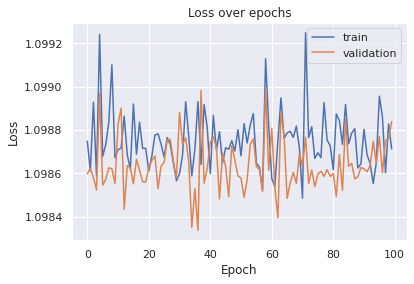

In [ ]:
ax = plt.figure().gca()
ax.plot(history['train'])
ax.plot(history['val'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.title('Loss over epochs')
plt.savefig('Loss_over_epochs.png')

In [ ]:
act =np.array(act)
act= act.reshape(1200)


In [ ]:
pred = np.array(pred)
pred = pred.reshape(1200)

In [ ]:
f1_score(act, pred, average='macro')

0.3202042801934852

In [ ]:
conf_matrix = confusion_matrix(y_true=act, y_pred=pred)

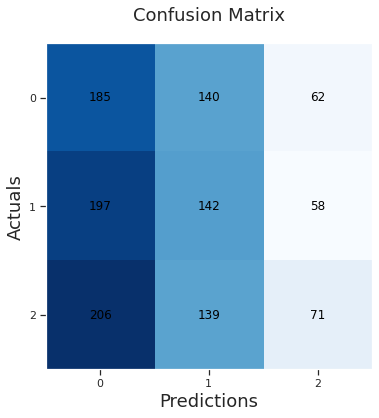

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**PREDICTION**

In [ ]:
test_dl = DataLoader(test_data, batch_size=64, shuffle=False)
y_classif = []
predict_classif = []
correct = 0
total = 0
print('Predicting on test dataset')
model = model.to(device)
with torch.no_grad():
  for data in test_data:
    x,y = data
    #print("x",x)
    x = x.to(device)
    y = y.to(device)
    x=torch.unsqueeze(x,2)
    out = model.train()(x)
    _,predicted = torch.max(out.data,1)
    total += y.size(0)
    correct += (predicted==y).sum().item()
    #print(f'y{y}')
    #print(f'predicted{predicted}')
    y_classif +=y.tolist()
    predict_classif +=predicted.tolist()

#print("y_classif",y_classif)
#print("predict_classif",predict_classif)
f1 =f1_score(y_classif, predict_classif, average='macro')
print(f'f1 score is {f1}')

print("accuracy on test %d %%" % (100 * correct / total), )

Predicting on test dataset
f1 score is 0.17901234567901234
accuracy on test 33 %


In [ ]:
conf_matrix = confusion_matrix(y_true=y_classif, y_pred=predict_classif)

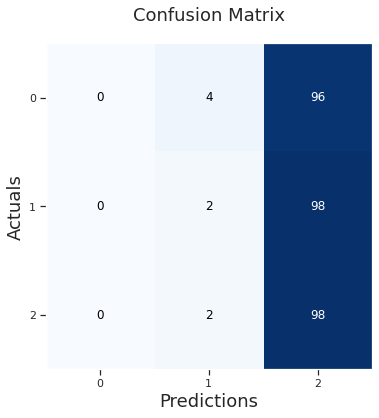

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()